## **Jobsheet 3**

### **Praktikum 1**
#### **Langkah 1: Persiapan Data**
#### **Langkah 2: Import Library**

In [31]:
import numpy as np
import pandas as pd

#### **Langkah 3: Baca Data**

In [32]:
# baca data dari file CSV
data = pd.read_csv('datasets/dataset.csv')

#### **Langkah 4: Pemahaman Terhadap Data**

In [33]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### **Langkah 5: Visualisasi Data**

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

```python
import seaborn as sns
```
kode ini bertujuan untuk mengimport library seaborn, library ini memiliki fungsi sebagai pemvisualisasi data yang sama dengan matplotlib

d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


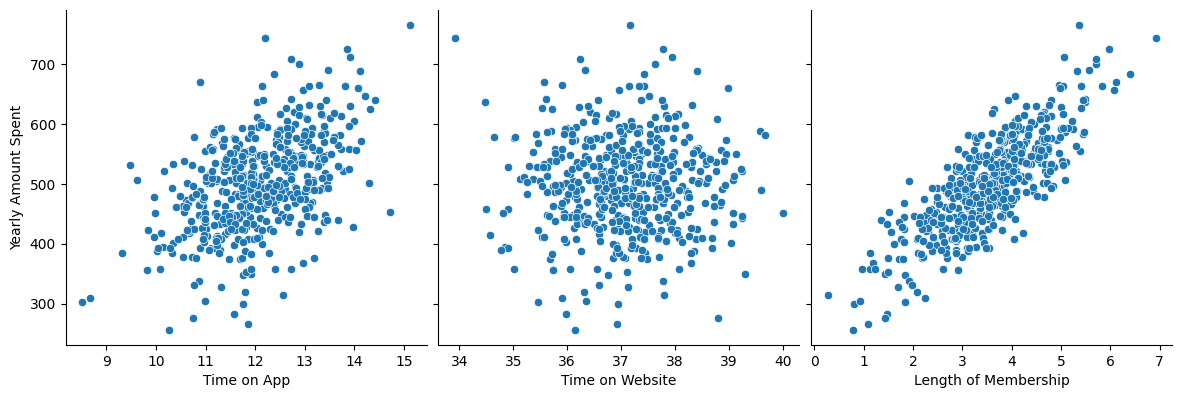

In [35]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

```python
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
```
kode ini digunakan untuk membuat grafik scatter dari features x_vars dan target y_vars yang mana keduanya diambil dari variabel data. size=4 digunakan untuk mengatur ukuran output, aspect=1 digunakan untuk mengatur rasio dari subplotnya, kind='scatter' digunakan untuk mengatur jenis grafik.

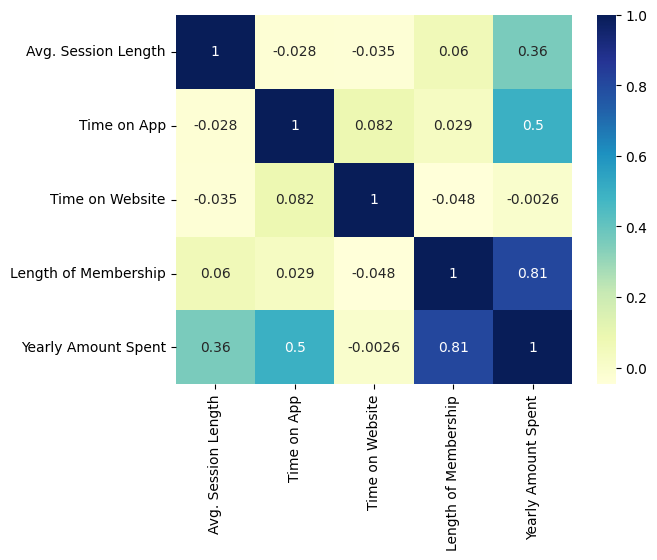

In [36]:
numeric_data = data.select_dtypes(include=[np.number])
# sns.heatmap(data.corr(), cmap="Y1GnBu", annot=True)
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

kode di atas bertujuan untuk menampilkan heatmap yang mana berfungsi untuk mengidentifikasi variabel manakah yang memiliki relasi paling kuat (kecuali dengan relasi itu sendiri).

#### **Langkah 6: Regresi Linier**

In [37]:
X = data['Length of Membership']
y = data['Yearly Amount Spent']

proses ekstraksi data dilakukan berdasarkan variabel manakah yang memiliki relasi paling tinggi

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.3, random_state=100)

pembagian data train dan data test dengan ratio 7:3 menggunakan train_test_split dari library sklearn

In [39]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

kode di atas merupakan proses fitting menggunakan model regresi OLS dari library statsmodels

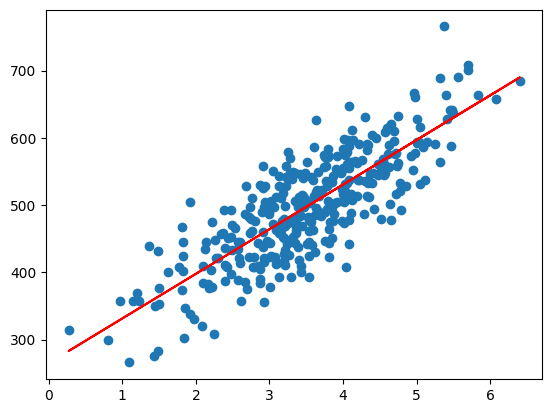

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2438 + 66.3015 * X_train, 'r')
plt.show()

#### **Langkah 7: Analisis Residual**

In [41]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

langkah di atas merupakan proses menghitung residu error dengan cara mengurangi y_train dan y_train_pred yang mana y_train_pred didapatkan dari hasil predict(X_train_sm)

<Figure size 640x480 with 0 Axes>

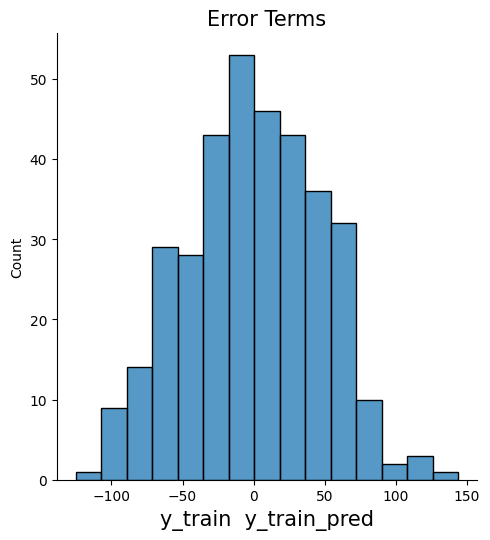

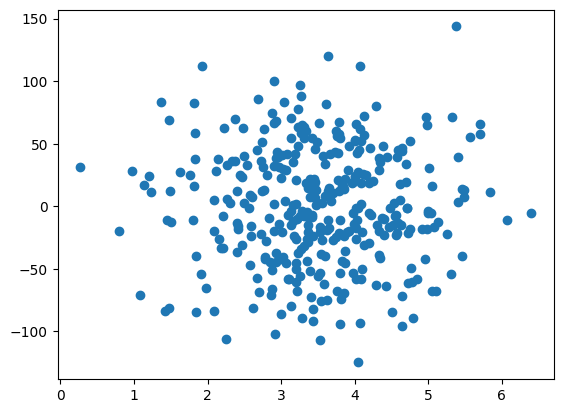

In [42]:
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train  y_train_pred', fontsize=15)
plt.show()

plt.scatter(X_train, res)
plt.show()

### **Praktikum 2**

In [43]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('datasets/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

Pengambilan data dari Posisi_gaji.csv, features diisi dengan dataset kolom 1 sampai kolom 2, sedangkan target diisi dengan kolom 2

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

Kode ini merupaka proses feature scaling menggunakan StandardScaler dengan tujuan untuk menyamakan rentang nilai

In [46]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Proses fitting menggunakan SVR dari library sklearn

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28372\1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


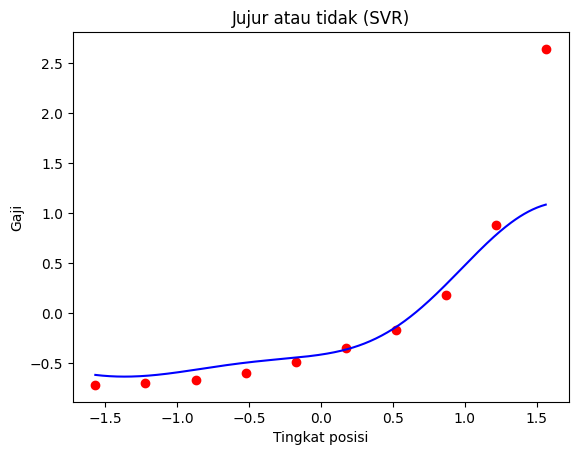

In [47]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Proses visualisasi dari model SVR dengan relasi Tingkat posisi dan Gaji

In [48]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Kode di atas merupakan proses prediksi dengan model yang sama, namun dengan nilai feature yang baru. tingkat_posisi_prediksi berisi nilai tingkat posisi, setelah itu variabel ini di scaling menggunakan StandardScaler dan langsung digunakan sebagai argumen dari function predict. 

Hasil dari regressor.predict kemudian diinverse ke skala awal sebelum discaling

In [49]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [50]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


Proses di atas berfungsi untuk mengevaluasi performa model, apakah model yang digunakan sudah berjalan dengan baik
```python
mae = mean_absolute_error(y_actual, y_pred)
```
berfungsi untuk mengukur selisih rata-rata antara nilai y_actual dan y_pred

```python
mse = mean_squared_error(y_actual, y_pred)
```
berfungsi untuk menghitung selisih kuadrat antara y_actual dan y_pred

```python
rmse = np.sqrt(mse)
```
berfungsi untuk menghitung akar kuadrat dari mse

```python
r2 = r2_score(y_actual, y_pred)
```
berfungsi untuk mengukur seberapa cocok prediksi dari model dibandingkan dengan data aslinya.

### **Tugas Praktikum**

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan tambahan:**
* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
* Analisis hasil yang anda dapatkan dalam tugas praktikum anda.

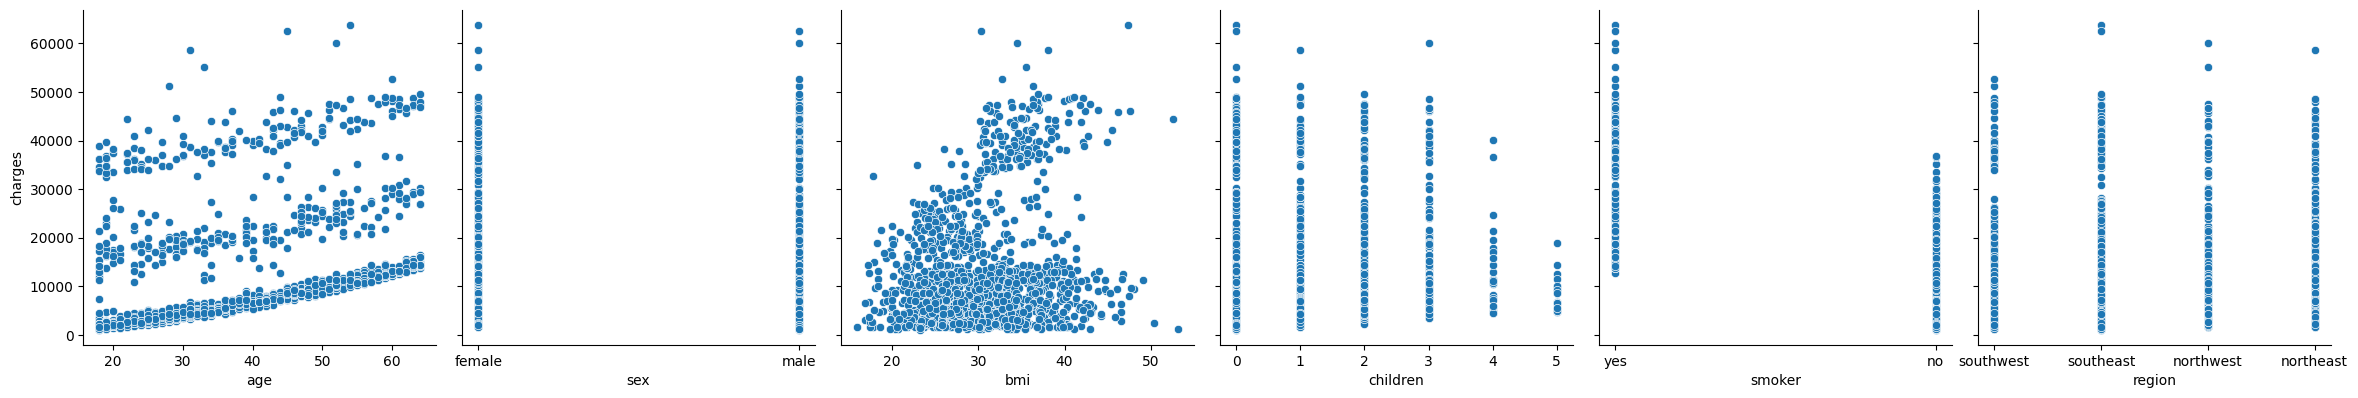

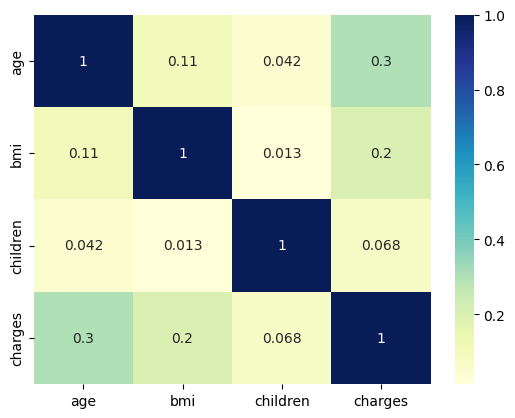

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('datasets/insurance.csv')

sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

numeric_data = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()
# df.head()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [63]:
X = df[['age', 'bmi', 'children']]
y = df['charges']/1000 # dibagi 1000 agar tidak terlalu besar

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

3. Lakukan feature scaling jika diperlukan

In [64]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)

X_test_scaled = std.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn
5. Latih model pada data latih dan lakukan prediksi pada data uji

In [65]:
model = LinearRegression()
# sgdr = SGDRegressor(max_iter=1000)

model.fit(X_train_scaled, y_train)
# sgdr.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
# y_pred_sgdr = sgdr.predict(X_train_scaled)

6. Evaluasi model dengan menghitung metrik seperti R-Squared, MSE, dan MAE. Tampilkan hasil evaluasi.

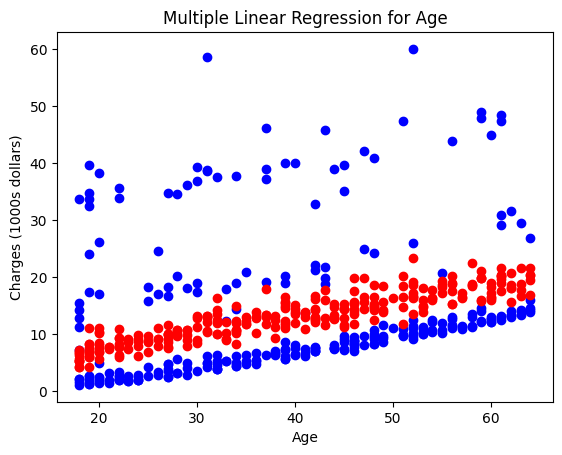

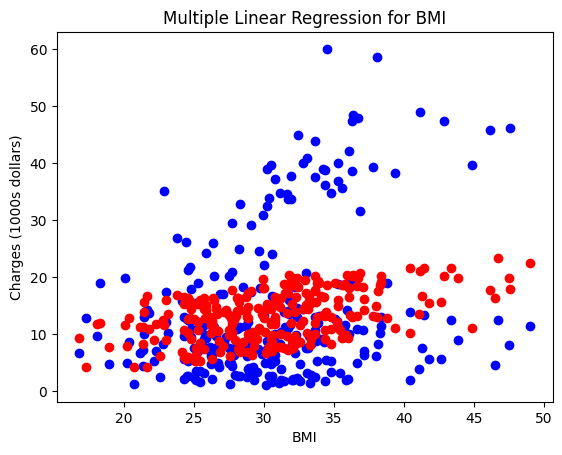

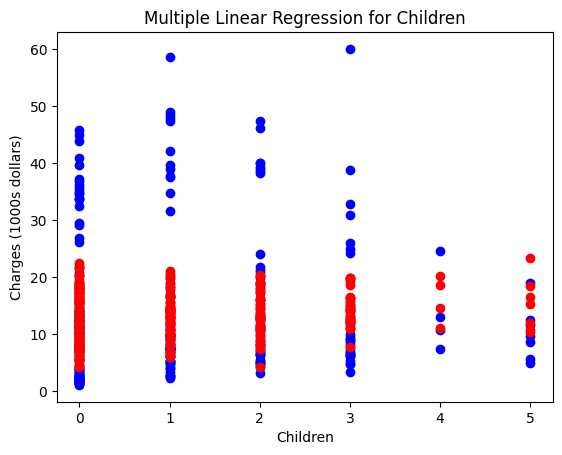

MAE: 9.336545180644135
MSE: 145.68862523462406
RMSE: 12.070154316934977
R-Squared: 0.07091124032821494


In [66]:
# Menggunakan Linear Regression
plt.scatter(X_test['age'], y_test, color='blue')
plt.scatter(X_test['age'], y_pred, color='red')

# Menggunakan SGDRegressor
# plt.scatter(X_train['age'], y_train, color='blue')
# plt.scatter(X_train['age'], y_pred_sgdr, color='red')
plt.title("Multiple Linear Regression for Age")
plt.xlabel("Age")
plt.ylabel("Charges (1000s dollars)")
plt.show()

# Menggunakan Linear Regression
plt.scatter(X_test['bmi'], y_test, color='blue')
plt.scatter(X_test['bmi'], y_pred, color='red')

# Menggunakan SGDRegressor
# plt.scatter(X_train['bmi'], y_train, color='blue')
# plt.scatter(X_train['bmi'], y_pred_sgdr, color='red')
plt.title("Multiple Linear Regression for BMI")
plt.xlabel("BMI")
plt.ylabel("Charges (1000s dollars)")
plt.show()

# Menggunakan Linear Regression
plt.scatter(X_test['children'], y_test, color='blue')
plt.scatter(X_test['children'], y_pred, color='red')

# Menggunakan SGDRegressor
# plt.scatter(X_train['children'], y_train, color='blue')
# plt.scatter(X_train['children'], y_pred_sgdr, color='red')
plt.title("Multiple Linear Regression for Children")
plt.xlabel("Children")
plt.ylabel("Charges (1000s dollars)")
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
mae = mean_absolute_error(y_test, y_pred)

# SGDRegressor
# mae = mean_absolute_error(y_train, y_pred_sgdr)

# Linear Regression
mse = mean_squared_error(y_test, y_pred)

# SGDRegressor
# mse = mean_squared_error(y_train, y_pred_sgdr)

rmse = np.sqrt(mse)

# Linear Regression
r2 = r2_score(y_test, y_pred)

# SGDRegressor
# r2 = r2_score(y_train, y_pred_sgdr)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")